<a href="https://colab.research.google.com/github/GithubPython7Eduard/Python-Library/blob/main/Fashion_MNIST_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Neural Network

In [1]:
# Set seeds for reproducibility

import random                        # random  -->  built-in package for Python
random.seed(0)                       # seed  -->  specific number

import numpy as np                   # numpy  -->  create a NumPy arrays
np.random.seed(0)                    # initialized the weights of NN start of the training

import tensorflow as tf              # consolidate, clean and preprocess data at scale
tf.random.set_seed(0)

Importing the Dependencies

In [2]:
# keras  -->  high level API --> building or training NN much easier
# keras  -->  keras support both tensorflow and pytorch
from tensorflow.keras import datasets, layers, models

# datasets  -->  Fashion MNIST dataset
# layers  -->  convolutional Neural Network
# models  -->  save you models

# matplotlib  -->  plot images
import matplotlib.pyplot as plt

Data Curation

In [3]:
# Load and prepare the Fashion MNIST dataset

# load the dataset of Keras, for example Kaggle or other company
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Training data  -->  (train_images, train_labels)
# Test data  -->  (test_images, test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Data Processing

In [4]:
# check the training images
type(train_images)

numpy.ndarray

In [5]:
# check the training images Labels
type(train_labels)

numpy.ndarray

In [6]:
# print the number of images
print(len(train_images))

60000


In [7]:
# train labels corresponding
print(len(train_labels))

60000


In [8]:
# images height is 28 pixel
# images width is 28 pixel
print(train_images[0].shape)

(28, 28)


In [9]:
# train images of 0
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

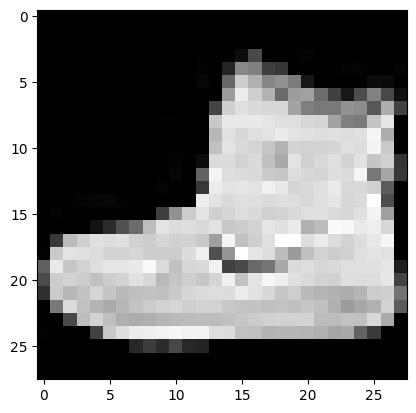

In [10]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [11]:
# corresponding the Label
print(train_labels[0])

9


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Train our Model

In [12]:
# Normalize pixel values to be between 0 and 1
# divided value by maximum number (255)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [14]:
# Reshape images to specify that it's a single channel (grayscale)
# Reshape Keras and Tensorflow models requires 4 dimensional

# 0  -->  First Dimensional number of images dataset
# 28  -->  Second Dimensional pixel of height
# 28  -->  Third Dimensional pixel of width
# 1 -->  Your Channel Information, gray scale image or RGB image

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [15]:
train_images.shape

(60000, 28, 28, 1)

In [16]:
test_images.shape

(10000, 28, 28, 1)

Convolutional Neural Network

In [18]:
# Build the convolutional base
# from tensorflow.keras import models
model = models.Sequential()

# adding the layers
# Conv2D  -->  Convolutional 2 dimensional layers
# 32  -->  kernels or filters, detect several features, image shape recognize
# 3, 3  -->  some convolutional operation, image present features
# activation='relu'  -->  our rectified linear units Activation Function
# input_shape=(28, 28, 1)  -->  our gray scale
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# MaxPooling2D  -->  reduce your special dimensions which is height and width easier recognize model
model.add(layers.MaxPooling2D((2, 2)))

# 64  -->  kernels
# 3, 3  -->  matrix or filters -->  recognize some basic feactures
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
# Flatten  -->  vector, 1 dimensional array
model.add(layers.Flatten())

# Dense  -->  Deeply connected Layer, previous layer connected next layer
# 64  -->  Neurons units
model.add(layers.Dense(64, activation='relu'))

# Output layer which classify the image as the class
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile and Train model
# Compile  -->  Making the model ready for training
# optimizer='adam'  -->  find the best parameters for model
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
              metrics = ['accuracy'])

# loss  -->  loss function
# SparseCategoricalCrossentropy  -->  you have the classes that are not encoded
# from_logits='True'  -->  output give the probability
# metrics = ['accuracy']  -->  train on the accuracy

Model Training

In [29]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data = (test_images, test_labels))

# model.fit  -->  pass the train images
# validation_data  -->  each epoch split train is training_images

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.0872 - val_accuracy: 0.8877 - val_loss: 0.4851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9677 - loss: 0.0834 - val_accuracy: 0.8930 - val_loss: 0.4842
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9699 - loss: 0.0775 - val_accuracy: 0.8956 - val_loss: 0.4595
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9698 - loss: 0.0762 - val_accuracy: 0.8930 - val_loss: 0.5388
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9736 - loss: 0.0693 - val_accuracy: 0.8944 - val_loss: 0.5345


Model Evaluation

In [30]:
# Evaluate the model
# model -->  we call model evaluate passes test_images and test_labels
# verbose=2  -->  get some information
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8944 - loss: 0.5345

Test accuracy: 0.8944000005722046


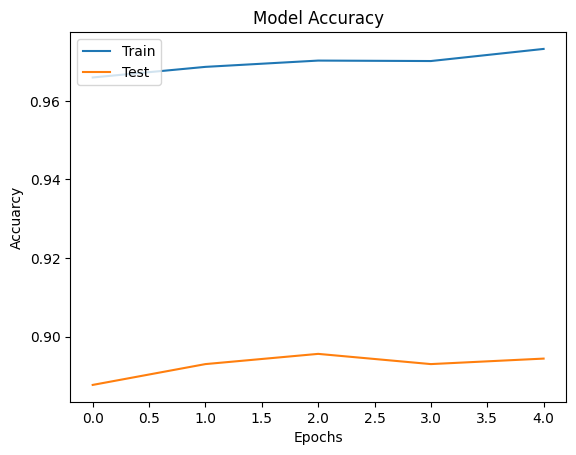

<function matplotlib.pyplot.show(close=None, block=None)>

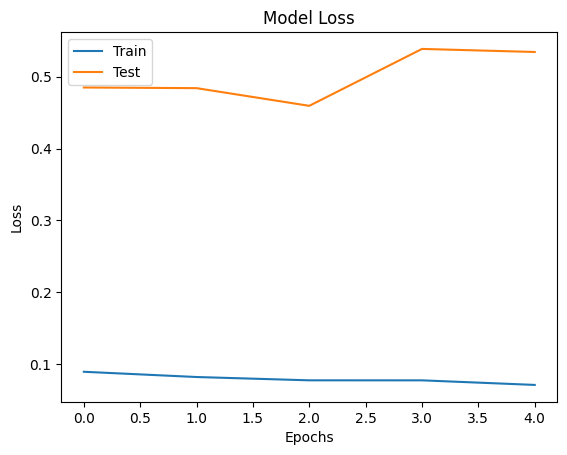

In [33]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show

In [34]:
# save model
model.save('trained_fashion_mnist_model.h5')